SVM: support - predict based on data closetest to boundary 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
def gen_data(num_data_pnts, mu1, mu2, plot):
    # note: mu1 and mu2 are 2D inputs with means of each condition for each variable
    tmp1 = np.random.randn(num_data_pnts, 1) + mu1[0]
    tmp2 = np.random.randn(num_data_pnts, 1) + mu1[1]
    c1_data = np.hstack((tmp1, tmp2))
    
    tmp1 = np.random.randn(num_data_pnts, 1) + mu2[0]
    tmp2 = np.random.randn(num_data_pnts, 1) + mu2[1]
    c2_data = np.hstack((tmp1, tmp2))
    
    if plot: # boolean
        plt.scatter(c1_data[:,0], c1_data[:, 1], color = 'b')
        plt.scatter(c2_data[:,0], c2_data[:, 1], color = 'r')
        plt.xlabel("Variable 1")
        plt.ylabel("Variable 2")
        plt.legend(["Cond 1", "Cond 2"])
        plt.show()
    
    return c1_data, c2_data

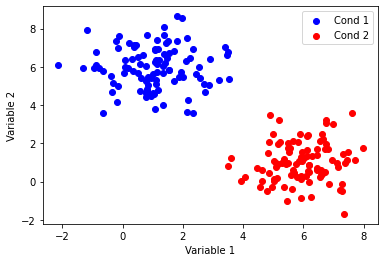

In [18]:
np.random.seed(8)

my_mu1 = np.array([1,6])
my_mu2 = np.array([6,1])

N = 100

d1, d2 = gen_data(num_data_pnts = N, mu1 = my_mu1, mu2 = my_mu2, plot = True)

In [4]:
print(np.mean(d1))
print(np.mean(d2))

3.5709104931411604
3.371985516447213


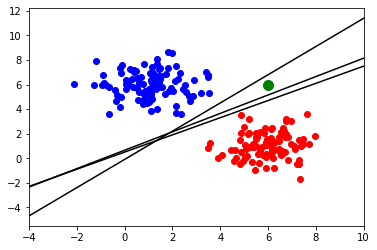

In [19]:
x_range = -4, 10
x_vals = np.linspace(x_range[0], x_range[1])

plt.scatter(d1[:,0], d1[:,1], c = 'b')
plt.scatter(d2[:,0], d2[:,1], c = 'r')

for a, b in [(.75, .65), (.7, .5), (1.15, -.1)]:
    plt.plot(x_vals, a * x_vals + b, '-k')
    
plt.xlim(x_range[0], x_range[1])
plt.plot(6,6,'o', c = 'g', markersize = 10)
plt.show()

In [20]:
def gen_data(num_data_pnts, mu1, mu2, plot):
    # note: mu1 and mu2 are 2D inputs with means of each condition for each variable
    tmp1 = np.random.randn(num_data_pnts, 1) + mu1[0]
    tmp2 = np.random.randn(num_data_pnts, 1) + mu1[1]
    c1_data = np.hstack((tmp1, tmp2))
    
    tmp1 = np.random.randn(num_data_pnts, 1) + mu2[0]
    tmp2 = np.random.randn(num_data_pnts, 1) + mu2[1]
    c2_data = np.hstack((tmp1, tmp2))
    
    if plot: # boolean
        plt.scatter(c1_data[:,0], c1_data[:, 1], color = 'b')
        plt.scatter(c2_data[:,0], c2_data[:, 1], color = 'r')
        plt.xlabel("Variable 1")
        plt.ylabel("Variable 2")
        plt.legend(["Cond 1", "Cond 2"])
        plt.show()
    
    return c1_data, c2_data

In [21]:
p_train = 0.9

# rows, columns in the data
r, c = d1.shape

trn_length = int(np.round(p_train * r, 0))

trn_data = np.vstack((d1[:trn_length,:], d2[:trn_length,:]))
tst_data = np.vstack((d1[trn_length:,:], d2[trn_length:,:]))

# labels
trn_l = np.hstack((np.zeros(trn_length), np.ones(trn_length)))
tst_l = np.hstack((np.zeros(r-trn_length), np.ones(r-trn_length)))

model = SVC(kernel='linear', C=1) # C-regularization param

# fit the model
model.fit(trn_data, trn_l)

SVC(C=1, kernel='linear')

(100, 100)


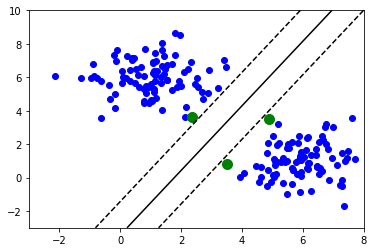

In [22]:
x = np.linspace(-3, 8, 100)
y = np.linspace(-3, 10, 100)
X,Y = np.meshgrid(x,y)
print(X.shape)
#X[0,:]
#plt.imshow(Y)
#plt.show()

# good way to eval 2D functions over all possible combinations of points 
XY = np.vstack([X.ravel(), Y.ravel()]).T
XY.shape
 
DF = model.decision_function(XY).reshape(X.shape) # defines boundary 

plt.scatter(trn_data[:,0], trn_data[:,1], c='b')
axis = plt.gca() # get current axis
axis.contour(X, Y, DF, 
             colors = 'k', 
             levels = [-0.8, 0, 0.8], 
             linestyles = ['--', '-', '--'])

axis.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
            s = 100, c = 'g')

plt.show()